In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as ml
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


In [2]:
iris = pd.read_csv('/kaggle/input/iris/Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


##### Renaming columns and encoding the Species column

In [3]:
iris.drop(columns=['Id'],inplace=True)
iris = iris.rename(columns = {'SepalLengthCm':'SL','SepalWidthCm':'SW','PetalLengthCm':'PL','PetalWidthCm':'PW'})
iris['Species'].replace('Iris-setosa','0',inplace=True)
iris['Species'].replace('Iris-versicolor','1',inplace=True)
iris['Species'].replace('Iris-virginica','2',inplace=True)
iris

,SL,SW,PL,PW,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


##### 0 is Iris-setosa.
##### 1 is Iris-versicolor.
##### 2 is Iris-virginica.

In [4]:
data = iris[['SL','PL','Species']]
data

,SL,PL,Species
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0
...,...,...,...
145,6.7,5.2,2
146,6.3,5.0,2
147,6.5,5.2,2
148,6.2,5.4,2


## Creating and training the classifiers (Decision Tree & KNN)

In [5]:
X = data.iloc[:,:2].values
Y = data.iloc[:,-1].values
scaler = StandardScaler()

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=9)

x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [6]:
# 1
dt = DecisionTreeClassifier(criterion='entropy',splitter='best')
dt.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [7]:
# 2
knn = KNeighborsClassifier(n_neighbors = 13, algorithm = 'auto')
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')

## Creating the meshgrid

In [8]:
xc = np.arange(start = x_train[:,0].min()-1, stop = x_train[:,0].max()+1, step = 0.01)
yc = np.arange(start = x_train[:,1].min()-1, stop = x_train[:,1].max()+1, step = 0.01)
print(xc.shape,yc.shape)

(644,) (528,)


In [9]:
XX,YY = np.meshgrid(xc,yc)
print("XX : ", XX.shape,", YY : ",YY.shape)

XX :  (528, 644) , YY :  (528, 644)


In [10]:
528 * 644

340032


## Creating the input test data and Z(predicted labels)

In [11]:
data_test = np.array([XX.ravel(),YY.ravel()]).T
data_test.shape

(340032, 2)

In [12]:
# 1
y_pred1 = dt.predict(data_test)
print(y_pred1.shape)
y_pred1

(340032,)


array(['0', '0', '0', ..., '2', '2', '2'], dtype=object)

In [13]:
# 2
y_pred2 = knn.predict(data_test)
print(y_pred2.shape)
y_pred2

(340032,)


array(['0', '0', '0', ..., '2', '2', '2'], dtype=object)

## Visualizing the decision boundaries

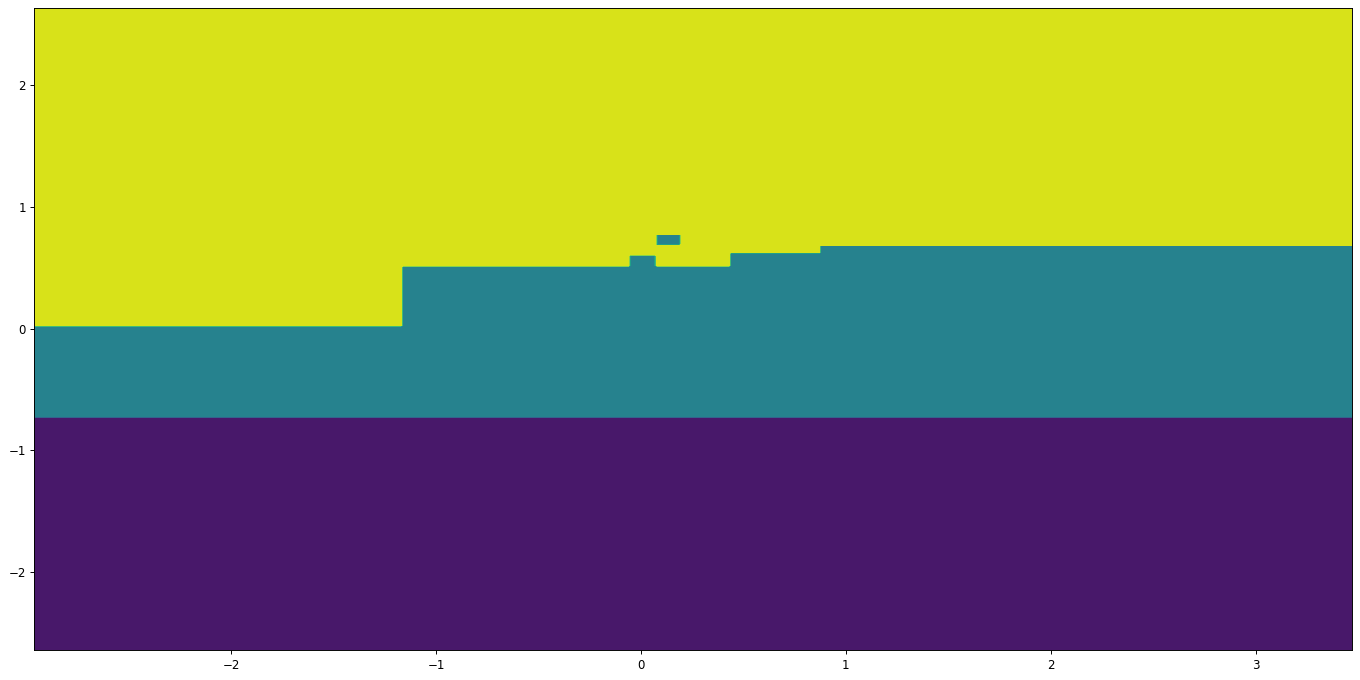

In [14]:
# 1
plt.figure(figsize=(20,10),dpi=85)
Z1 = y_pred1.reshape(XX.shape)
plt.contourf(XX,YY,Z1)
plt.show()

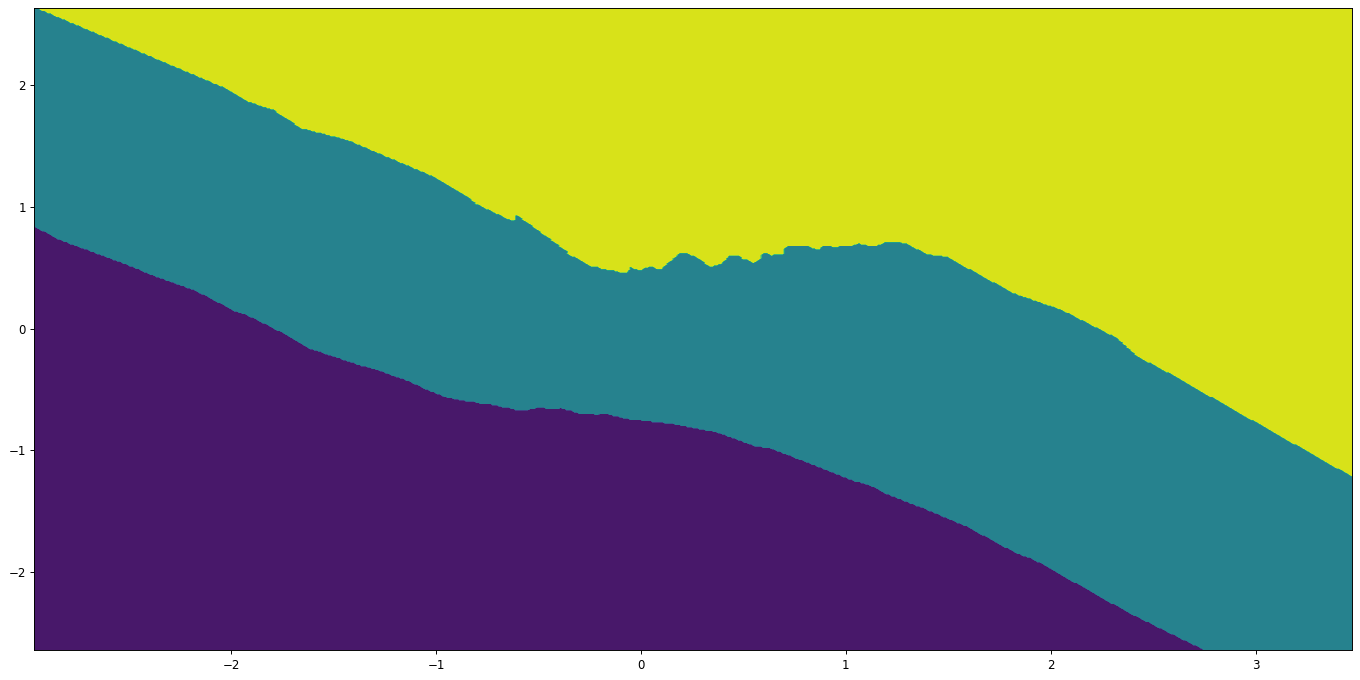

In [15]:
# 2
plt.figure(figsize=(20,10),dpi=85)
Z2 = y_pred2.reshape(XX.shape)
plt.contourf(XX,YY,Z2)
plt.show()

## Plotting the training data

In [16]:
# Assign colors to labels trained on
colors_dict = {'0':'white','1':'pink','2':'red'}
y_train = [colors_dict[i] for i in y_train]
y_train

['red',
 'red',
 'white',
 'pink',
 'pink',
 'pink',
 'pink',
 'white',
 'red',
 'white',
 'white',
 'red',
 'pink',
 'white',
 'red',
 'pink',
 'white',
 'pink',
 'white',
 'red',
 'pink',
 'pink',
 'white',
 'pink',
 'red',
 'red',
 'red',
 'red',
 'pink',
 'white',
 'red',
 'white',
 'white',
 'pink',
 'red',
 'white',
 'pink',
 'pink',
 'red',
 'pink',
 'pink',
 'white',
 'white',
 'red',
 'pink',
 'white',
 'red',
 'pink',
 'red',
 'pink',
 'white',
 'pink',
 'pink',
 'white',
 'white',
 'red',
 'pink',
 'red',
 'white',
 'pink',
 'white',
 'white',
 'pink',
 'red',
 'red',
 'white',
 'white',
 'pink',
 'pink',
 'red',
 'red',
 'white',
 'red',
 'white',
 'white',
 'red',
 'white',
 'red',
 'pink',
 'white',
 'red',
 'pink',
 'pink',
 'white',
 'red',
 'pink',
 'red',
 'red',
 'pink',
 'red',
 'pink',
 'pink',
 'white',
 'pink',
 'red',
 'white',
 'red',
 'pink',
 'white',
 'red',
 'red',
 'white',
 'red',
 'white',
 'white',
 'red',
 'red',
 'pink',
 'red',
 'pink',
 'red',
 'whi

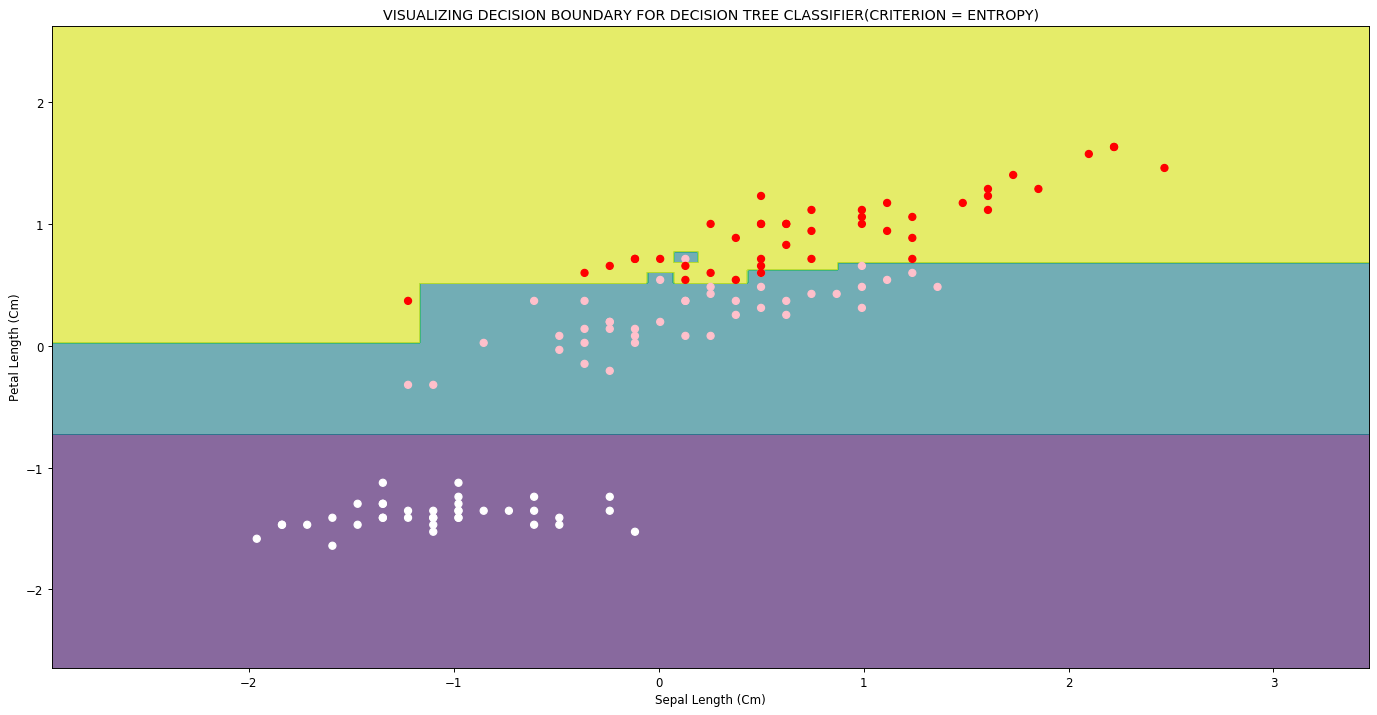

In [17]:
# Plotting
# 1
plt.figure(figsize=(20,10),dpi=85)
plt.contourf(XX,YY,y_pred1.reshape(XX.shape),alpha=0.65)
plt.scatter(x=x_train[:,0],y=x_train[:,1],c=y_train,marker='o')
plt.xlabel("Sepal Length (Cm)")
plt.ylabel("Petal Length (Cm)")
plt.title('VISUALIZING DECISION BOUNDARY FOR DECISION TREE CLASSIFIER(CRITERION = ENTROPY)')
plt.show()

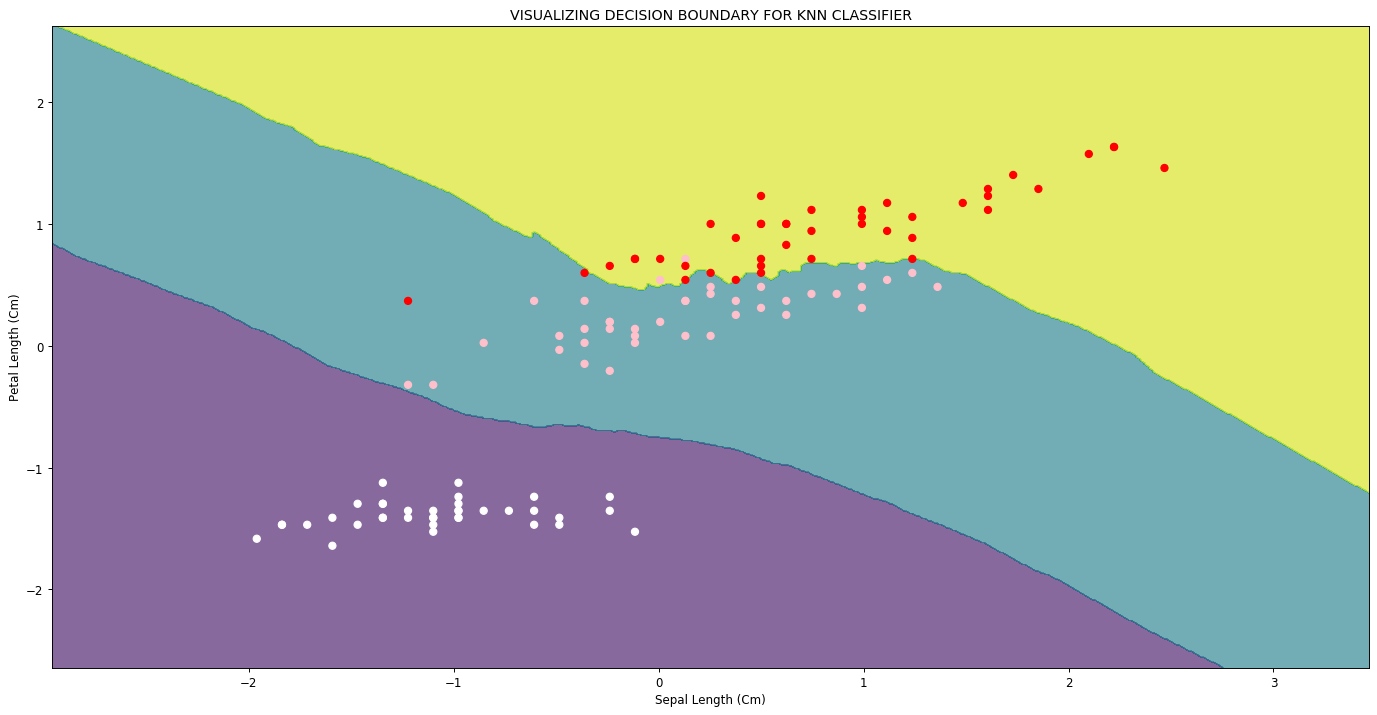

In [18]:
# 2
plt.figure(figsize=(20,10),dpi=85)
plt.contourf(XX,YY,y_pred2.reshape(XX.shape),alpha=0.65)
plt.scatter(x=x_train[:,0],y=x_train[:,1],c=y_train,marker='o')
plt.xlabel("Sepal Length (Cm)")
plt.ylabel("Petal Length (Cm)")
plt.title('VISUALIZING DECISION BOUNDARY FOR KNN CLASSIFIER')
plt.show()